# 주제: 서울시 공공 자전거 수요 분석
- 자료출처:
    - http://data.seoul.co.kr
    - https://archive.ics.uci.edu
    - https://archive.ics.uci.edu/ml/datasets/Seoul+Bike+Sharing+Demand

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.font_manager as fm
font_name= fm.FontProperties(fname='C:\\Windows\\Fonts\\malgun.ttf').get_name()
plt.rc('font',family=font_name)

import matplotlib as mlp
mlp.rcParams['axes.unicode_minus']=False

## 1. Data Definition

In [2]:
bike= pd.read_csv('data/SeoulBikeData.csv')
bike.head()
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      8760 non-null   object 
 1   Rented Bike Count         8760 non-null   int64  
 2   Hour                      8760 non-null   int64  
 3   Temperature(C)            8760 non-null   float64
 4   Humidity(%)               8760 non-null   int64  
 5   Wind speed (m/s)          8760 non-null   float64
 6   Visibility (10m)          8760 non-null   int64  
 7   Dew point temperature(C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)   8760 non-null   float64
 9   Rainfall(mm)              8760 non-null   float64
 10  Snowfall (cm)             8760 non-null   float64
 11  Seasons                   8760 non-null   object 
 12  Holiday                   8760 non-null   object 
 13  Functioning Day           8760 non-null   object 
dtypes: float

## 2. Quiz

### (1) 시간대별로 평균 몇 대가 대여되었을까?
    bike.groupby('Hour').mean()[['Rented Bike Count']].round(2)

In [36]:
bike.groupby('Hour').mean()[['Rented Bike Count']].round(2)

,Rented Bike Count
Hour,
0,541.46
1,426.18
2,301.63
3,203.33
4,132.59
5,139.08
6,287.56
7,606.01
8,1015.70


In [3]:
hour= bike.groupby('Hour')[['Rented Bike Count']].mean()
hour

,Rented Bike Count
Hour,
0,541.460274
1,426.183562
2,301.630137
3,203.331507
4,132.591781
5,139.082192
6,287.564384
7,606.005479
8,1015.701370


### (2) 위의 결과를 시각화
시간대별로 몇 대
선그래프 line
    
    데이터프레임은 plot을 이용해서 바로 선그래프 그릴 수 있음
    bike.groupby('Hour').mean()[['Rented Bike Count']].plot()
    plt.axvline(x=8, color='r')    #세로선(x축에) 긋기
    plt.axvline(x=18, color='r')    #8시, 18시
    plt.text(6,150,'출근')
    plt.text(6,150,'퇴근')

Text(16, 150, '퇴근')

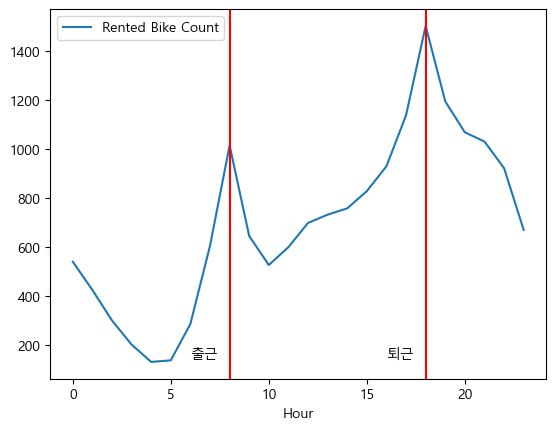

In [38]:
bike.groupby('Hour').mean()[['Rented Bike Count']].plot()
plt.axvline(x=8, color='r')    
plt.axvline(x=18, color='r')   
plt.text(6,150,'출근')
plt.text(16,150,'퇴근')

AttributeError: module 'matplotlib.pyplot' has no attribute 'add_legend'

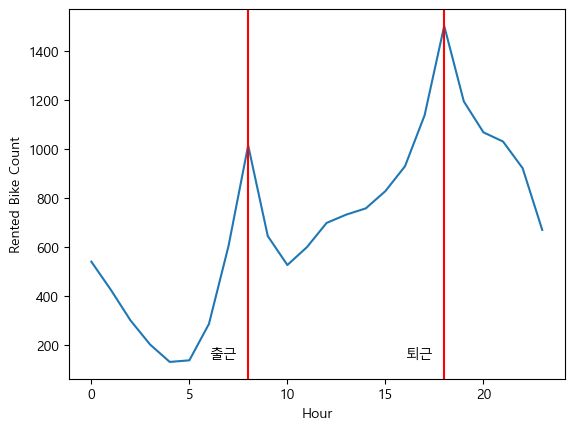

In [35]:
sns.lineplot(data= hour, x='Hour', y='Rented Bike Count')
plt.axvline(x=8, color='r')    #세로선(x축에) 긋기
plt.axvline(x=18, color='r')    #8시, 18시
plt.text(6,150,'출근')
plt.text(16,150,'퇴근')

### (3) 요일별로 평균 몇 대가 대여되었을까?
요일별로 day 인덱스 생성
전체 날짜에 대해 요일 알 수 있게

In [5]:
# 날짜를 인덱스로 활용
date_str=bike['Date']

# idx= pd.to_datetime(date_str)   # 인덱스로 활용 가능
# bike.info()
# date_strdate_str.unique()
mon= pd.date_range('2017-12-1','2018-11-30', freq='W-MON')
tue= pd.date_range('2017-12-1','2018-11-30', freq='W-TUE')
wed= pd.date_range('2017-12-1','2018-11-30', freq='W-WED')
thu= pd.date_range('2017-12-1','2018-11-30', freq='W-THU')
fri= pd.date_range('2017-12-1','2018-11-30', freq='W-FRI')
sat= pd.date_range('2017-12-1','2018-11-30', freq='W-SAT')
sun= pd.date_range('2017-12-1','2018-11-30', freq='W-SUN')

In [6]:
bike['Date'] = pd.to_datetime(bike['Date']) 

C:\Users\acorn\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '13/12/2017' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\acorn\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '14/12/2017' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\acorn\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '15/12/2017' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\acorn\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '16/12/2017' in DD/MM/YYYY format. Provide format or specif

In [7]:
# 'date' 컬럼에서 요일 정보 추출
bike['Day'] = bike['Date'].dt.day_name()  # 요일 정보를 추출하여 bike['weekday']컬럼 추가

day = {'Monday':0,"Tuesday":1,"Wednesday":2, "Thursday":3,"Friday":4, "Saturday":5, "Sunday":6}  
# # map 기능을 이용하여 요일을 숫자로 표현한 컬럼을 만들어준다.
# bike["num_weekday"] = bike["weekday"].map(bike_map) 
# bike_day = bike.groupby("num_weekday")[["Rented Bike Count"]].mean()  # 시리즈가 아닌 데이터 프레임 형태로 보기 위해 컬럼을 []로 한번 더 묶어줌

In [8]:
?pd.DataFrame.dt

Object `pd.DataFrame.dt` not found.


In [9]:
bike['Date'] = pd.to_datetime(bike['Date']) 
bike['Day'] = bike['Date'].dt.day_name()
bike.groupby(bike['Day'])['Rented Bike Count'].mean()

Day
Friday       734.449346
Monday       719.635833
Saturday     730.348558
Sunday       615.968364
Thursday     743.803686
Tuesday      678.362421
Wednesday    714.521226
Name: Rented Bike Count, dtype: float64

#### 1) 첫번째 방법

- ?pd.Series.dt
- https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.html?highlight=dt#pandas.Series.dt

In [10]:
bike['weekday']= pd.to_datetime(bike['Date']).dt.weekday  # 시리즈.dt.weekday: 요일을 숫자로 뽑아내기 (0:월 ~7:일)

#### 2) 두번째 방법

In [11]:
bike['weekday2']= pd.to_datetime(bike['Date'], format='%d/%m/%Y').dt.weekday

weekday1은 월/일/년 순으로 되어있고 weekday2는 일/월/년 순으로 되어있다. 에러 안나도 검증 필수

In [12]:
bike

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Day,weekday,weekday2
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Thursday,3,3
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Thursday,3,3
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,Thursday,3,3
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Thursday,3,3
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Thursday,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,Friday,4,4
8756,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,Friday,4,4
8757,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,Friday,4,4
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,Friday,4,4


In [13]:
bike.groupby('weekday').mean()

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),weekday2
weekday,,,,,,,,,,,
0,719.635833,11.5,13.152667,59.271667,1.709750,1338.918333,4.751500,0.580767,0.095083,0.073000,0.0
1,678.362421,11.5,12.749764,56.610063,1.725943,1494.935535,3.580582,0.563884,0.190566,0.094340,1.0
2,714.521226,11.5,12.371619,59.968553,1.891588,1415.717767,3.989308,0.555299,0.199292,0.116116,2.0
3,743.803686,11.5,13.234535,58.207532,1.715865,1472.190705,4.438702,0.558814,0.192788,0.068590,3.0
4,734.449346,11.5,13.433088,59.520425,1.650082,1397.733660,4.866748,0.564624,0.112500,0.053023,4.0
5,730.348558,11.5,12.646154,56.452724,1.761619,1507.133814,3.309054,0.625489,0.084936,0.077003,5.0
6,615.968364,11.5,12.635494,57.638117,1.618364,1426.325617,3.649537,0.536867,0.160648,0.042978,6.0


In [14]:
bike.groupby('weekday2').mean()

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),weekday
weekday2,,,,,,,,,,,
0,719.635833,11.5,13.152667,59.271667,1.709750,1338.918333,4.751500,0.580767,0.095083,0.073000,0.0
1,678.362421,11.5,12.749764,56.610063,1.725943,1494.935535,3.580582,0.563884,0.190566,0.094340,1.0
2,714.521226,11.5,12.371619,59.968553,1.891588,1415.717767,3.989308,0.555299,0.199292,0.116116,2.0
3,743.803686,11.5,13.234535,58.207532,1.715865,1472.190705,4.438702,0.558814,0.192788,0.068590,3.0
4,734.449346,11.5,13.433088,59.520425,1.650082,1397.733660,4.866748,0.564624,0.112500,0.053023,4.0
5,730.348558,11.5,12.646154,56.452724,1.761619,1507.133814,3.309054,0.625489,0.084936,0.077003,5.0
6,615.968364,11.5,12.635494,57.638117,1.618364,1426.325617,3.649537,0.536867,0.160648,0.042978,6.0


#### 3) 세번째 방법
날짜 차이 계산

In [15]:
date_diff= pd.to_datetime(bike['Date'], format='%d/%m/%Y')- pd.to_datetime('2016-01-01')
new= date_diff.astype(str).str.split(' ', expand= True) # astype(str)만 하면 object 타입. expand로 700과 days도 완전 나누기
#date_diff가 숫자와 문자가 섞여있기때문에 object형으로 변환됨
new

,0,1
0,377,days
1,377,days
2,377,days
3,377,days
4,377,days
...,...,...
8755,1064,days
8756,1064,days
8757,1064,days
8758,1064,days


In [16]:
def func_week(x):
    if x%7==0:
        return '금요일'
    elif x%7==1:
        return '토요일'
    elif x%7==2:
        return '일요일'
    elif x%7==3:
        return '월요일'
    elif x%7==4:
        return '화요일'
    elif x%7==5:
        return '수요일'
    elif x%7==6:
        return '목요일'
# lambda나 map 이용해보기
bike['weekday3']= new[0].astype(int).apply(func_week)
#new[0]은 숫자만으로 이뤄져있어서 int타입으로 바로 변환가능
bike

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Day,weekday,weekday2,weekday3
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Thursday,3,3,목요일
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Thursday,3,3,목요일
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,Thursday,3,3,목요일
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Thursday,3,3,목요일
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Thursday,3,3,목요일
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,Friday,4,4,금요일
8756,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,Friday,4,4,금요일
8757,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,Friday,4,4,금요일
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,Friday,4,4,금요일


In [17]:
bike['weekday4']= (((pd.to_datetime(bike['Date'], format='%d/%m/%Y')- pd.to_datetime('2016-01-01')).dt.days) \
                   % 7).map({0:'금요일', 1:'토요일', 2:'일요일', 3:'월요일', 4:'화요일', 5:'수요일', 6:'목요일'})

In [18]:
bike.loc[[50]]

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Day,weekday,weekday2,weekday3,weekday4
50,2017-03-12,228,2,3.3,79,1.4,830,0.0,0.0,0.0,0.0,Winter,No Holiday,Yes,Sunday,6,6,일요일,일요일


In [19]:
bike.groupby('weekday3').mean()[['Rented Bike Count']]

,Rented Bike Count
weekday3,
금요일,734.449346
목요일,743.803686
수요일,714.521226
월요일,719.635833
일요일,615.968364
토요일,730.348558
화요일,678.362421


### (4) 위의 결과를 시각화
막대그래프 

<BarContainer object of 8760 artists>

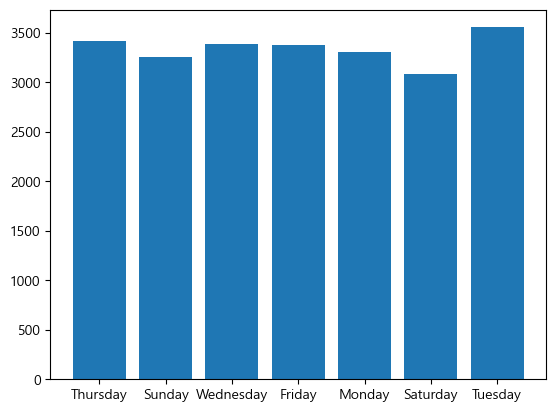

In [20]:
plt.bar(bike['Day'],bike['Rented Bike Count'])

<AxesSubplot:xlabel='weekday3', ylabel='Rented Bike Count'>

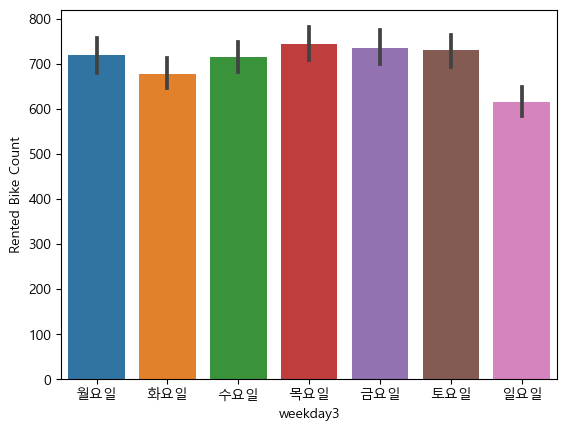

In [21]:
sns.barplot(x='weekday3', y='Rented Bike Count', data= bike,
           order=['월요일','화요일','수요일','목요일','금요일','토요일','일요일'])

### (5) 요일별, 시간대별로 시각화

<AxesSubplot:xlabel='Hour', ylabel='Rented Bike Count'>

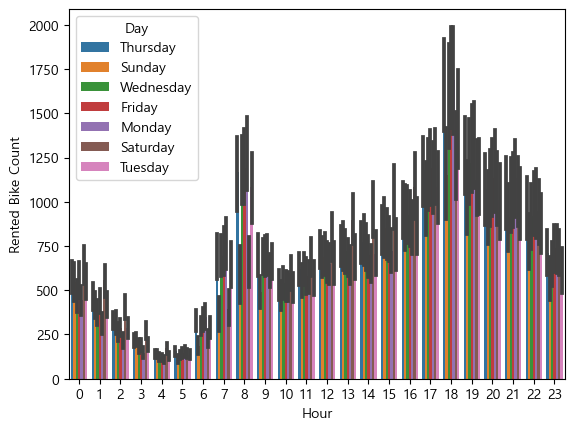

In [22]:
?sns.barplot
sns.barplot(x='Hour', y='Rented Bike Count', data= bike, hue='Day')

<AxesSubplot:xlabel='Hour'>

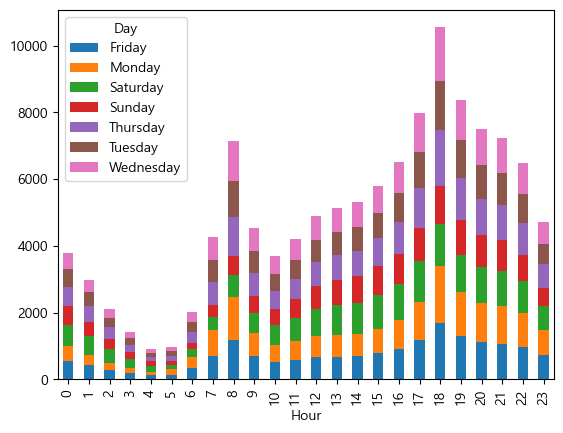

In [23]:
table= bike.pivot_table(index="Hour", columns = "Day", values="Rented Bike Count")
table
table.plot(kind="bar", stacked=True)

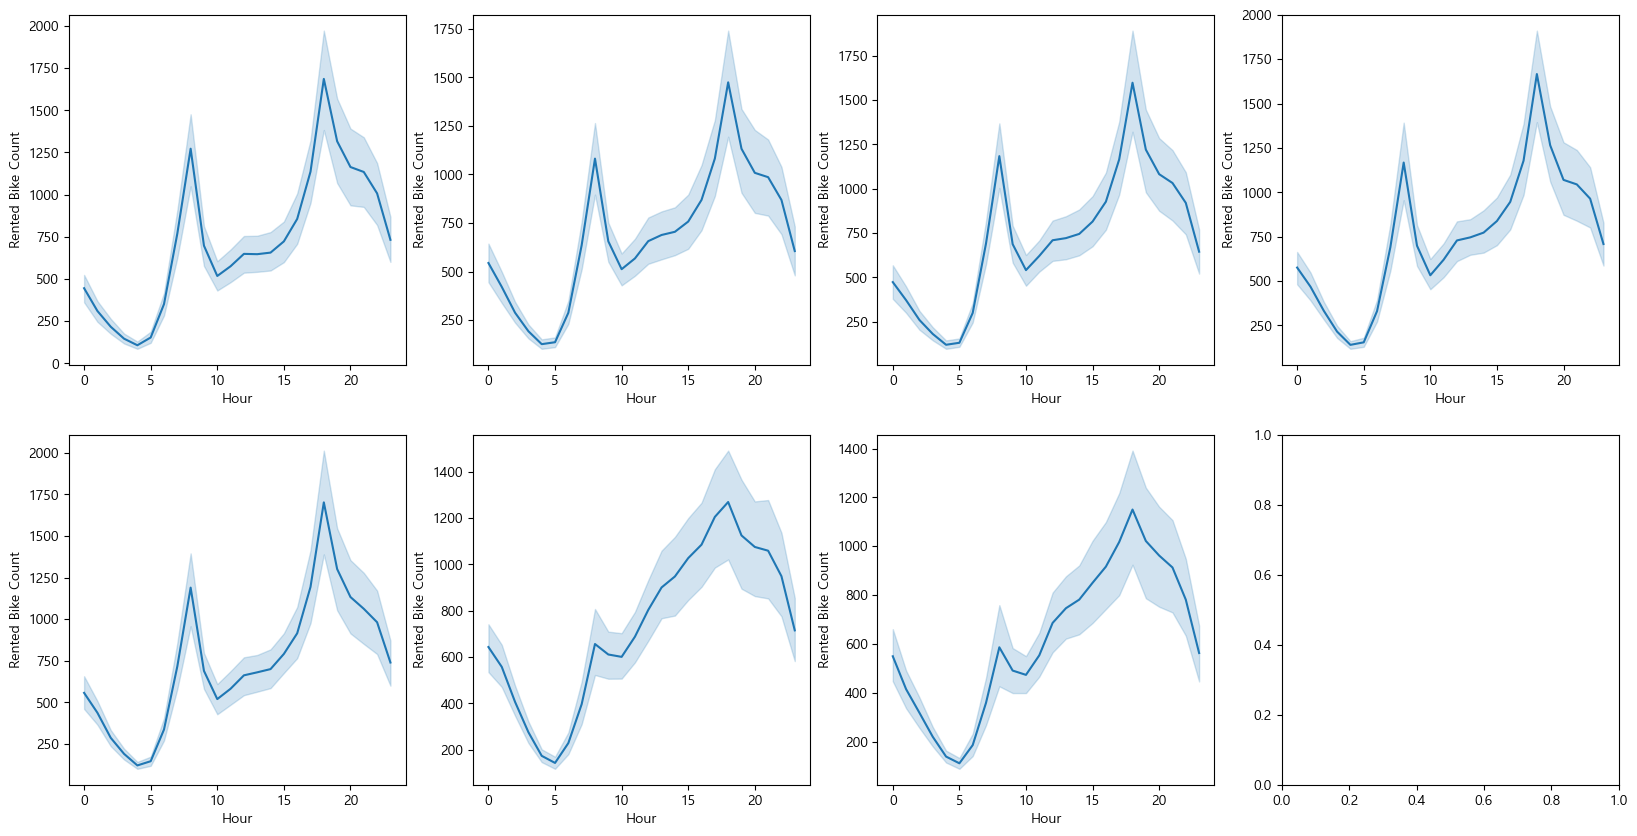

In [24]:
_, ax= plt.subplots(2,4, figsize=(20,10))   # _: 건너뛰기

for i in range(7):
    sns.lineplot(x='Hour',y='Rented Bike Count', data= bike[bike['weekday2']==i], ax= ax[i//4,i%4])

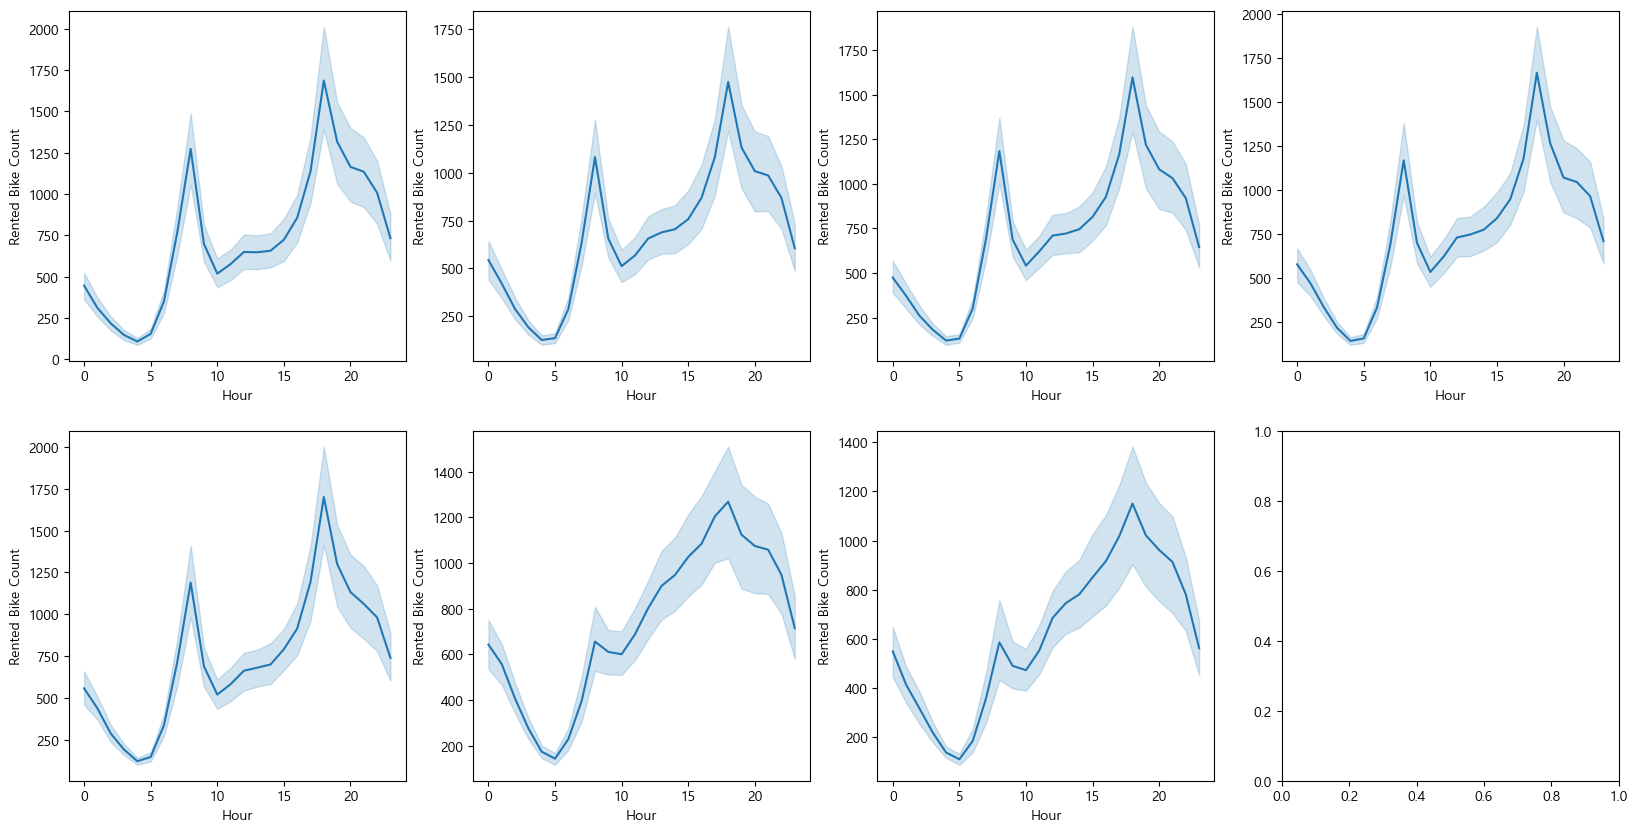

In [39]:
_, ax= plt.subplots(2,4, figsize=(20,10))

for i in range(7):
    sns.lineplot(x='Hour',y='Rented Bike Count', data= bike[bike['weekday2']==i], ax= ax[i//4,i%4])

### (6) 가장 많이 대여된 계절은?
    bike.groupby('Seasons').mean()[['Rented Bike Count']]

In [40]:
bike.groupby('Seasons')['Rented Bike Count'].sum()

Seasons
Autumn    1790002
Spring    1611909
Summer    2283234
Winter     487169
Name: Rented Bike Count, dtype: int64

### (7) 온도와 대여횟수 관계 시각화
    sns.regplot
    sns.scatterplot

In [26]:
?sns.scatterplot

In [45]:
bike.groupby('Seasons')['Rented Bike Count'].sum()

Seasons
Autumn    1790002
Spring    1611909
Summer    2283234
Winter     487169
Name: Rented Bike Count, dtype: int64

<AxesSubplot:xlabel='Temperature(C)', ylabel='Rented Bike Count'>

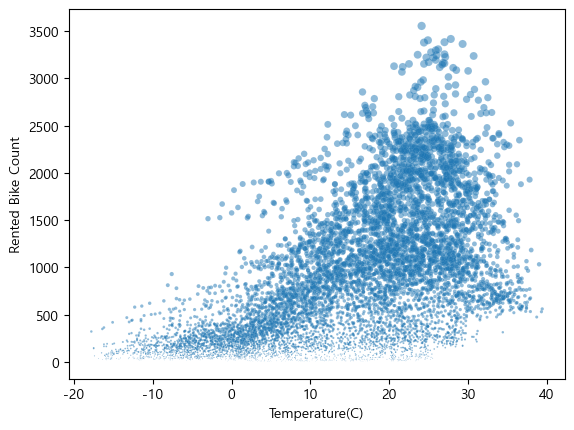

In [47]:
sns.scatterplot(data=bike, x='Temperature(C)', y='Rented Bike Count',
                s= bike['Rented Bike Count']*0.01, alpha= 0.5)

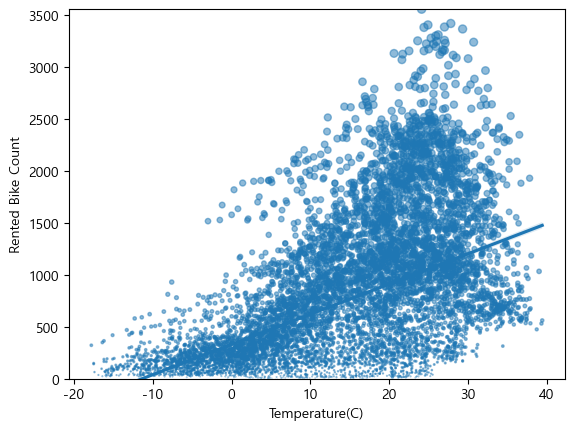

In [46]:
temp= sns.regplot(data=bike, x='Temperature(C)', y='Rented Bike Count',
                  scatter_kws={"s": bike['Rented Bike Count']*0.01, 'alpha':0.5})
temp.set(ylim=(0,bike['Rented Bike Count'].max()), autoscale_on=True)
?sns.regplot

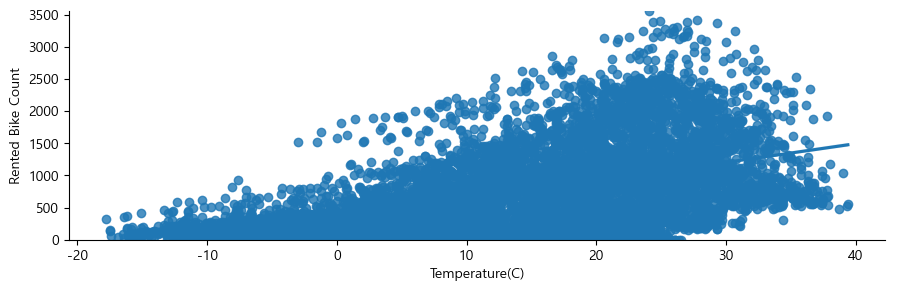

In [29]:
facet= sns.FacetGrid(bike, aspect=3)  # 바탕  
# hue: 다른 변수에 따라 데이터를 색상으로 구분하여 시각화 (그래프분리)  aspect: 그래프 가로 크기
facet.map(sns.regplot, x='Temperature(C)', y='Rented Bike Count', data= bike)
# 밀도: sns.kdeplot
facet.add_legend()  # 범례
facet.set(ylim=(0,bike['Rented Bike Count'].max()))  # x축 범위 설정

In [30]:
bike[bike['Rented Bike Count']==0]

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Day,weekday,weekday2,weekday3,weekday4
3144,2018-11-04,0,0,14.4,82,4.6,1041,11.3,0.0,0.0,0.0,Spring,No Holiday,No,Sunday,6,6,일요일,일요일
3145,2018-11-04,0,1,13.6,81,3.6,886,10.3,0.0,0.0,0.0,Spring,No Holiday,No,Sunday,6,6,일요일,일요일
3146,2018-11-04,0,2,12.7,80,3.9,885,9.3,0.0,0.0,0.0,Spring,No Holiday,No,Sunday,6,6,일요일,일요일
3147,2018-11-04,0,3,11.6,81,3.1,687,8.4,0.0,0.0,0.0,Spring,No Holiday,No,Sunday,6,6,일요일,일요일
3148,2018-11-04,0,4,10.2,83,3.5,554,7.4,0.0,0.0,0.0,Spring,No Holiday,No,Sunday,6,6,일요일,일요일
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8251,2018-09-11,0,19,11.9,71,2.7,589,6.7,0.0,0.0,0.0,Autumn,No Holiday,No,Tuesday,1,1,화요일,화요일
8252,2018-09-11,0,20,11.9,72,2.5,526,7.0,0.0,0.0,0.0,Autumn,No Holiday,No,Tuesday,1,1,화요일,화요일
8253,2018-09-11,0,21,11.4,74,1.9,498,6.9,0.0,0.0,0.0,Autumn,No Holiday,No,Tuesday,1,1,화요일,화요일
8254,2018-09-11,0,22,11.2,75,1.7,478,6.9,0.0,0.0,0.0,Autumn,No Holiday,No,Tuesday,1,1,화요일,화요일


<AxesSubplot:xlabel='Temperature(C)', ylabel='Rented Bike Count'>

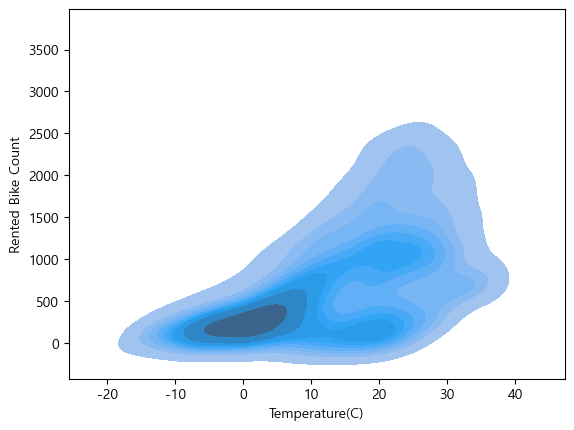

In [31]:
sns.kdeplot(x="Temperature(C)", y="Rented Bike Count", data=bike, shade=True)

<AxesSubplot:xlabel='Hour'>

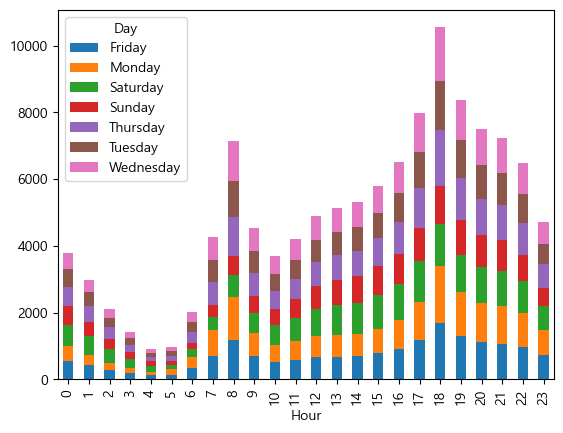

In [32]:
table.plot.bar(stacked=True)